In [1]:
from rdkit import Chem
import numpy as np
np.random.seed(123)  # for reproducibility
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import tensorflow as tf

In [2]:
SMILES_CHAR = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'y',
               'A', 'B', 'C', 'D', 'E', 'G', 'F', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 
               'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               '#', '%', '(', ')', '[', ']', '-', '+', '=', '.', '/', '\\', '@']

char_to_ind = {c : i for i, c in enumerate(SMILES_CHAR)}

In [3]:
def smiles_to_array(smiles: str, max_len: int) -> np.array:
    mol_array = np.zeros((max_len, len(SMILES_CHAR)))
    for i, c in enumerate(smiles):
        mol_array[i][char_to_ind[c]] = 1
    return mol_array

def array_to_smiles(mol_array: np.array) -> str:
    smiles = ''
    for l in mol_array:
        j = np.argmax(l)
        if l[j] == 0:
            break
        smiles += SMILES_CHAR[j]
    return smiles

(23310, 128, 128, 1)
(23310, 29, 66)
(128, 128, 1)


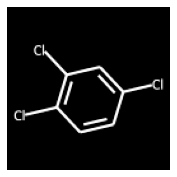

In [4]:
import os
import rapidjson
import cv2
from sklearn.model_selection import train_test_split

def create_filename(num: int) -> str:
    return str(num) + '.png'

FOLDER_NAME = 'images'
OUTPUT_FILENAME = 'num_of_images.json'

with open(OUTPUT_FILENAME, 'r') as json_file:
    data = rapidjson.load(json_file)

max_len = max([len(datum['smiles']) for datum in data])
pictures = []
smileses = []
for datum in data:
    img = cv2.imread(
        os.path.join(FOLDER_NAME, create_filename(datum['image_num'])),
        cv2.IMREAD_GRAYSCALE
    )
    img = img.astype('float32')
    img /= 255
    pictures.append(img)
    smileses.append(smiles_to_array(datum['smiles'], max_len))
pictures = np.expand_dims(np.array(pictures), axis=3)
smileses = np.array(smileses)
print(pictures.shape)
print(smileses.shape)
print(pictures[3].shape)
plt.figure(figsize=np.array(pictures[0].shape[:-1]) / 50)
plt.imshow(pictures[2], cmap='Greys')
plt.axis('off')
plt.tight_layout()
plt.show()
p_train, p_test, s_train, s_test = train_test_split(pictures, smileses, test_size=0.2)

In [5]:
model = Sequential()

model.add(Flatten(input_shape=(128,128,1)))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(29 * 66, activation='relu'))
model.add(Reshape((29, 66)))

model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2021-11-07 21:31:52.777659: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              67112960  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              4198400   
_________________________________________________________________
dense_3 (Dense)              (None, 1914)              7841658   
_________________________________________________________________
reshape (Reshape)            (None, 29, 66)            0         
Total params: 83,348,346
Trainable params: 83,348,346
Non-trainable params: 0
____________________________________________

In [6]:
model.fit(p_train, s_train, 
          batch_size=32, epochs=10)

2021-11-07 21:31:55.244876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
583/583 [==============================] - 219s 373ms/step - loss: 4.1835 - accuracy: 0.2786
Epoch 2/10
583/583 [==============================] - 212s 364ms/step - loss: 3.8834 - accuracy: 0.2873
Epoch 3/10
583/583 [==============================] - 603s 1s/step - loss: 3.8821 - accuracy: 0.2873
Epoch 4/10
583/583 [==============================] - 217s 372ms/step - loss: 3.8835 - accuracy: 0.2873
Epoch 5/10
583/583 [==============================] - 213s 366ms/step - loss: 3.8540 - accuracy: 0.2873
Epoch 6/10
583/583 [==============================] - 214s 367ms/step - loss: 3.8457 - accuracy: 0.2873
Epoch 7/10
583/583 [==============================] - 217s 372ms/step - loss: 3.8454 - accuracy: 0.2873
Epoch 8/10
583/583 [==============================] - 211s 363ms/step - loss: 3.8454 - accuracy: 0.2873
Epoch 9/10
583/583 [==============================] - 211s 362ms/step - loss: 3.8453 - accuracy: 0.2873
Epoch 10/10
583/583 [==============================] - 223s 382ms/s

In [7]:
model.evaluate(p_test, s_test)

146/146 [==============================] - 10s 63ms/step - loss: 3.8705 - accuracy: 0.2868


[3.8705105781555176, 0.28679418563842773]

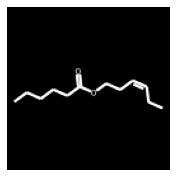

CCCCCCCCCCC=CCCCCCCCCCCC)CCCl
CCCCCC(=O)OCC/C=C\CC


In [9]:
ind = 70
plt.figure(figsize=np.array(p_test[ind].shape[:-1]) / 50)
plt.imshow(p_test[ind], cmap='Greys')
plt.axis('off')
plt.tight_layout()
plt.show()
smiles_array = model.predict(np.array([p_test[ind]]))
smiles_array = smiles_array.reshape(29, 66)
print(array_to_smiles(smiles_array))
ans = np.array(s_test[ind]).reshape(29, 66)
print(array_to_smiles(ans))

In [ ]:
kek_model = Model(inputs=model.input, outputs=model.layers[3].output)
kek_model.summary()

In [ ]:
p_size = 32
output_layout = kek_model.predict(np.array([p_test[ind]]))
print(output_layout[0, :, :, 0].reshape(p_size, p_size, -1).shape)
plt.imshow(output_layout[0, :, :, 1].reshape(p_size, p_size, -1), cmap='Greys')
plt.show()

In [ ]:
output_layout = kek_model.predict(np.array([p_test[ind]]))
all_layout_p = np.zeros((2 * p_size, 2 * p_size))
for i in range(2):
    for j in range(2):
        all_layout_p[i * p_size : (i + 1) * p_size, 
                     j * p_size : (j + 1) * p_size] = output_layout[0, :, :, 2 * i + j]
all_layout_p.reshape(2 * p_size, 2 * p_size, -1)
plt.imshow(all_layout_p, cmap='Greys')
plt.show()